<a href="https://colab.research.google.com/github/deepti-iiitr/spam-detector-2/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [4]:
df = pd.read_csv('spam.csv' , encoding = "ISO-8859-1")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5271,ham,So u wan 2 come for our dinner tonight a not?,NaN,NaN,NaN
1438,ham,"Arms fine, how's Cardiff and uni?",NaN,NaN,NaN
5382,ham,"I can make it up there, squeezed &lt;#&gt; b...",NaN,NaN,NaN
3312,ham,"Huh... Hyde park not in mel ah, opps, got conf...",NaN,NaN,NaN
662,ham,Sorry me going home first... Daddy come fetch ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
4189,ham,"Sorry, I'll call later"
3690,ham,"Sir, i am waiting for your call, once free ple..."
2669,spam,we tried to contact you re your response to ou...
2734,ham,Can you do a mag meeting this avo at some point?
3939,ham,Does daddy have a bb now.


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1285,ham,"Just wondering, the others just took off"
1628,ham,Yes princess! I want to make you happy...
3054,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...
1584,ham,"Sorry, I'll call later"
1669,ham,Very hurting n meaningful lines ever: \I compr...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
# EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

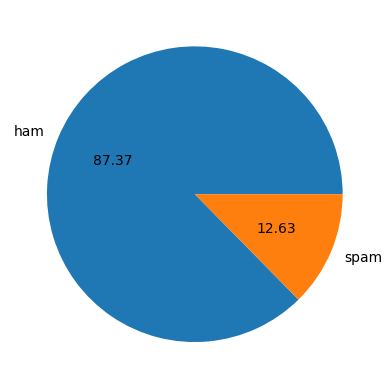

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
import nltk

In [25]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

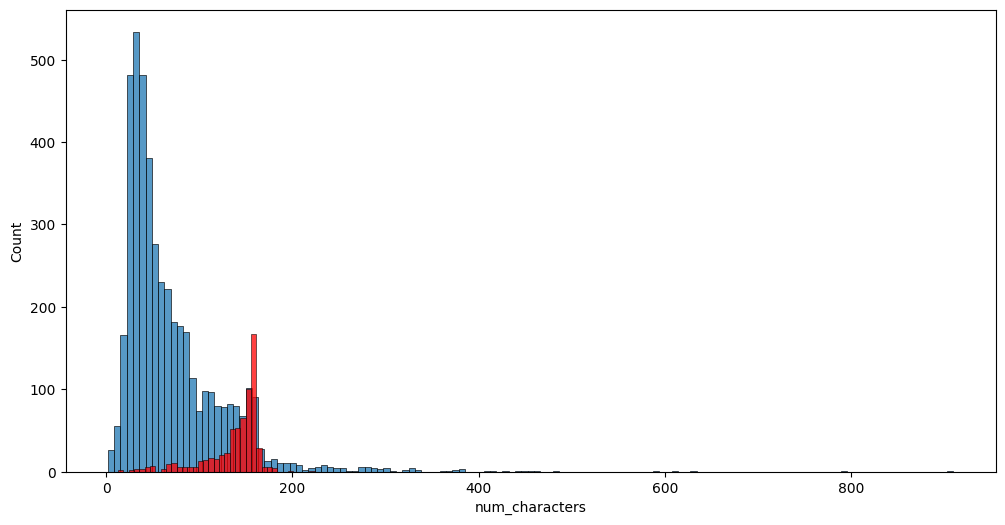

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

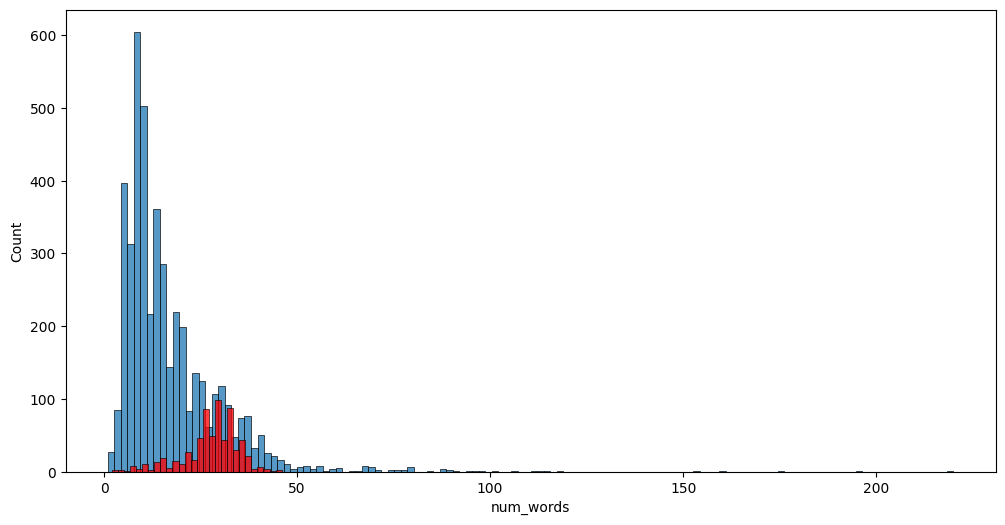

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


In [35]:
# DATA PREPROCESSING

In [36]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
transform_text("I'm gonna be home soon and play chess.")

'gon na home soon play chess'

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


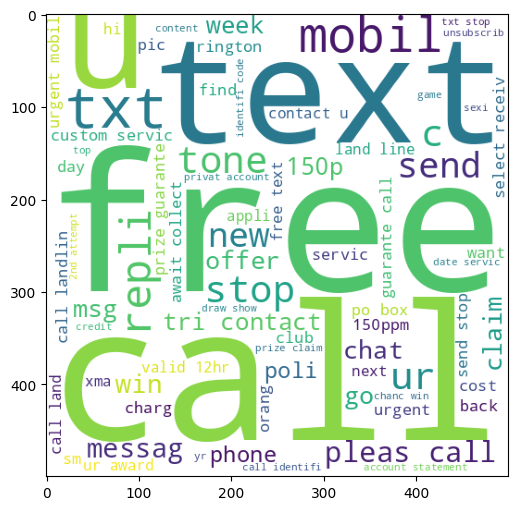

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

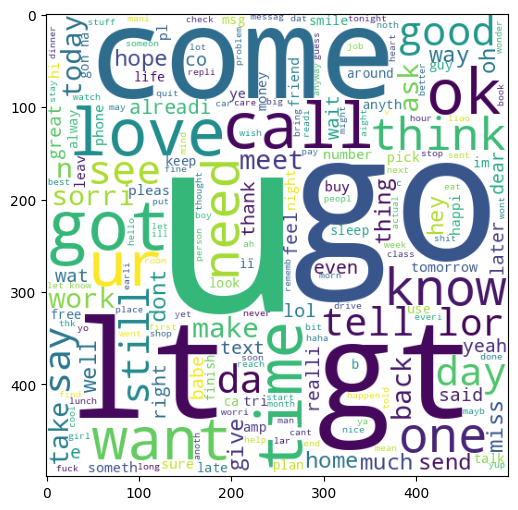

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Split into features and labels
X = df["text"]
y = df["target"]

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to the feature matrix
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4516, 1: 4516}


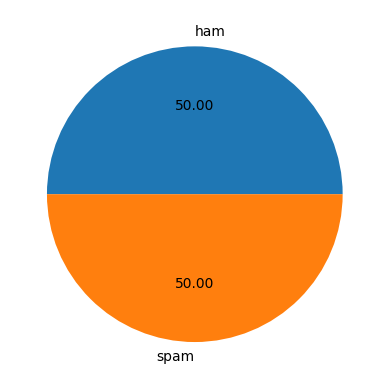

In [62]:
import matplotlib.pyplot as plt

# plot the pie chart
plt.pie(y_resampled.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train and evaluate the Multinomial Naive Bayes classifier
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
prec_mnb = precision_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes:")
print("Accuracy:", acc_mnb)
print("Confusion matrix:\n", cm_mnb)
print("Precision:", prec_mnb)
print("F1 score:", f1_mnb)

# Train and evaluate the Bernoulli Naive Bayes classifier
clf_bnb = BernoulliNB()
clf_bnb.fit(X_train, y_train)
y_pred_bnb = clf_bnb.predict(X_test)
acc_bnb = accuracy_score(y_test, y_pred_bnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
prec_bnb = precision_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes:")
print("Accuracy:", acc_bnb)
print("Confusion matrix:\n", cm_bnb)
print("Precision:", prec_bnb)
print("F1 score:", f1_bnb)

# Train and evaluate the Gaussian Naive Bayes classifier
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_dense, y_train)
y_pred_gnb = clf_gnb.predict(X_test_dense)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
prec_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes:")
print("Accuracy:", acc_gnb)
print("Confusion matrix:\n", cm_gnb)
print("Precision:", prec_gnb)
print("F1 score:", f1_gnb)


Multinomial Naive Bayes:
Accuracy: 0.9850581073602657
Confusion matrix:
 [[873  11]
 [ 16 907]]
Precision: 0.9880174291938998
F1 score: 0.9853340575774036
Bernoulli Naive Bayes:
Accuracy: 0.987825124515772
Confusion matrix:
 [[884   0]
 [ 22 901]]
Precision: 1.0
F1 score: 0.987938596491228
Gaussian Naive Bayes:
Accuracy: 0.9501936912008855
Confusion matrix:
 [[794  90]
 [  0 923]]
Precision: 0.9111549851924975
F1 score: 0.9535123966942148


In [56]:
from sklearn.metrics import classification_report

# Compute classification report for each classifier
target_names = ['ham', 'spam']

print('Multinomial Naive Bayes:')
print(classification_report(y_test, clf_mnb.predict(X_test), target_names=target_names))

print('Bernoulli Naive Bayes:')
print(classification_report(y_test, clf_bnb.predict(X_test), target_names=target_names))

print('Gaussian Naive Bayes:')
print(classification_report(y_test, clf_gnb.predict(X_test_dense), target_names=target_names))


Multinomial Naive Bayes:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       884
        spam       0.99      0.98      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807

Bernoulli Naive Bayes:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       884
        spam       1.00      0.98      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807

Gaussian Naive Bayes:
              precision    recall  f1-score   support

         ham       1.00      0.90      0.95       884
        spam       0.91      1.00      0.95       923

    accuracy                           0.95      1807
   macro avg       0.96      0.95      0.95      1807
weig

In [60]:
# Type 1 and type 2 errors for Multinomial Naive Bayes
tn_mnb, fp_mnb, fn_mnb, tp_mnb = confusion_matrix(y_test, y_pred_mnb).ravel()
type1_error_mnb = fp_mnb / (tn_mnb + fp_mnb)
type2_error_mnb = fn_mnb / (tp_mnb + fn_mnb)
print("Multinomial Naive Bayes:")
print("Type 1 error:", type1_error_mnb)
print("Type 2 error:", type2_error_mnb)

# Type 1 and type 2 errors for Bernoulli Naive Bayes
tn_bnb, fp_bnb, fn_bnb, tp_bnb = confusion_matrix(y_test, y_pred_bnb).ravel()
type1_error_bnb = fp_bnb / (tn_bnb + fp_bnb)
type2_error_bnb = fn_bnb / (tp_bnb + fn_bnb)
print("Bernoulli Naive Bayes:")
print("Type 1 error:", type1_error_bnb)
print("Type 2 error:", type2_error_bnb)

# Type 1 and type 2 errors for Gaussian Naive Bayes
tn_gnb, fp_gnb, fn_gnb, tp_gnb = confusion_matrix(y_test, y_pred_gnb).ravel()
type1_error_gnb = fp_gnb / (tn_gnb + fp_gnb)
type2_error_gnb = fn_gnb / (tp_gnb + fn_gnb)
print("Gaussian Naive Bayes:")
print("Type 1 error:", type1_error_gnb)
print("Type 2 error:", type2_error_gnb)



Multinomial Naive Bayes:
Type 1 error: 0.012443438914027148
Type 2 error: 0.01733477789815818
Bernoulli Naive Bayes:
Type 1 error: 0.0
Type 2 error: 0.023835319609967497
Gaussian Naive Bayes:
Type 1 error: 0.10180995475113122
Type 2 error: 0.0


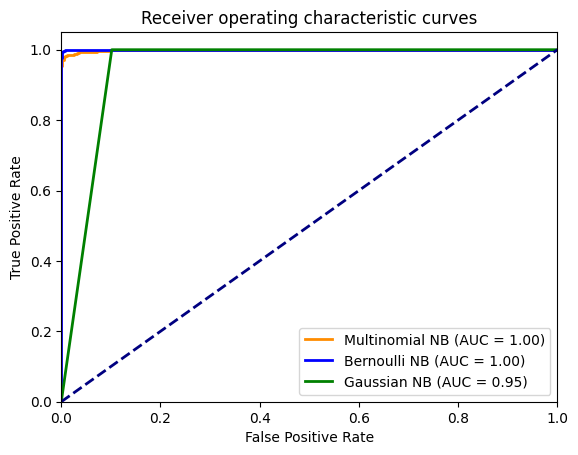

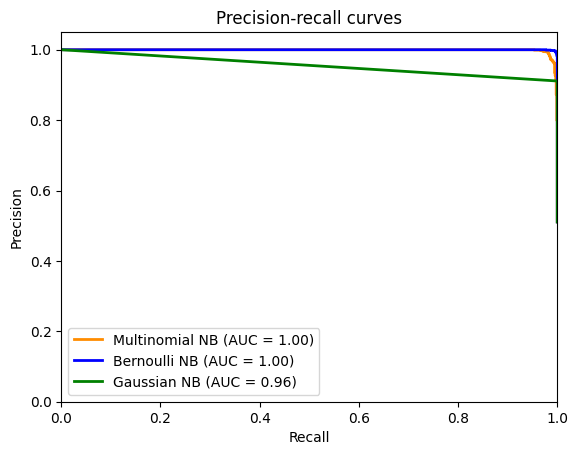

In [55]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Compute and plot ROC curves
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, clf_mnb.predict_proba(X_test)[:, 1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

fpr_bnb, tpr_bnb, _ = roc_curve(y_test, clf_bnb.predict_proba(X_test)[:, 1])
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, clf_gnb.predict_proba(X_test_dense)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
lw = 2
plt.plot(fpr_mnb, tpr_mnb, color='darkorange', lw=lw, label='Multinomial NB (AUC = %0.2f)' % roc_auc_mnb)
plt.plot(fpr_bnb, tpr_bnb, color='blue', lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bnb)
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=lw, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc="lower right")
plt.show()

# Compute and plot PR curves
precision_mnb, recall_mnb, _ = precision_recall_curve(y_test, clf_mnb.predict_proba(X_test)[:, 1])
pr_auc_mnb = auc(recall_mnb, precision_mnb)

precision_bnb, recall_bnb, _ = precision_recall_curve(y_test, clf_bnb.predict_proba(X_test)[:, 1])
pr_auc_bnb = auc(recall_bnb, precision_bnb)

precision_gnb, recall_gnb, _ = precision_recall_curve(y_test, clf_gnb.predict_proba(X_test_dense)[:, 1])
pr_auc_gnb = auc(recall_gnb, precision_gnb)

plt.figure()
lw = 2
plt.plot(recall_mnb, precision_mnb, color='darkorange', lw=lw, label='Multinomial NB (AUC = %0.2f)' % pr_auc_mnb)
plt.plot(recall_bnb, precision_bnb, color='blue', lw=lw, label='Bernoulli NB (AUC = %0.2f)' % pr_auc_bnb)
plt.plot(recall_gnb, precision_gnb, color='green', lw=lw, label='Gaussian NB (AUC = %0.2f)' % pr_auc_gnb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curves')
plt.legend(loc="lower left")
plt.show()
